In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [40]:
df=pd.read_csv('Final_Project_dataset.csv')

In [41]:
df.to_json('data.json')

In [73]:
print(df.head())

  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Target Failure Type  
0         42.8                0       0   No Failure  
1         46.3                3       0   No Failure  
2         49.4                5       0   No Failure  
3         39.5                7       0   No Failure  
4         40.0                9       0   No Failure  


In [43]:
print("Total No. oF Rows in the DataFrame:",df.shape[0])
print("Total No. oF Columns in the DataFrame:",df.shape[1])

Total No. oF Rows in the DataFrame: 10000
Total No. oF Columns in the DataFrame: 10


In [44]:
print("Columns oF the DataFrame:",df.columns)

Columns oF the DataFrame: Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


In [45]:
for i in df.columns:
    print('Total no. oF missing values in the "{}" column: {}'.format(i,df[i].isnull().sum()))

Total no. oF missing values in the "UDI" column: 0
Total no. oF missing values in the "Product ID" column: 0
Total no. oF missing values in the "Type" column: 0
Total no. oF missing values in the "Air temperature [K]" column: 0
Total no. oF missing values in the "Process temperature [K]" column: 0
Total no. oF missing values in the "Rotational speed [rpm]" column: 0
Total no. oF missing values in the "Torque [Nm]" column: 0
Total no. oF missing values in the "Tool wear [min]" column: 0
Total no. oF missing values in the "Target" column: 0
Total no. oF missing values in the "Failure Type" column: 0


In [46]:
print("Total no. oF duplicate values in the DataFrame: {}".format(df.duplicated().sum()))

Total no. oF duplicate values in the DataFrame: 0


In [47]:
for i in df.columns:
    print('Datatype oF "{}" column: {}'.format(i,df[i].dtype))

Datatype oF "UDI" column: int64
Datatype oF "Product ID" column: object
Datatype oF "Type" column: object
Datatype oF "Air temperature [K]" column: float64
Datatype oF "Process temperature [K]" column: float64
Datatype oF "Rotational speed [rpm]" column: int64
Datatype oF "Torque [Nm]" column: float64
Datatype oF "Tool wear [min]" column: int64
Datatype oF "Target" column: int64
Datatype oF "Failure Type" column: object


In [48]:
for i in df.columns:
    print('Unique no. oF values in the "{}" column: {}'.format(i,df[i].nunique()))

Unique no. oF values in the "UDI" column: 10000
Unique no. oF values in the "Product ID" column: 10000
Unique no. oF values in the "Type" column: 3
Unique no. oF values in the "Air temperature [K]" column: 93
Unique no. oF values in the "Process temperature [K]" column: 82
Unique no. oF values in the "Rotational speed [rpm]" column: 941
Unique no. oF values in the "Torque [Nm]" column: 577
Unique no. oF values in the "Tool wear [min]" column: 246
Unique no. oF values in the "Target" column: 2
Unique no. oF values in the "Failure Type" column: 6


In [49]:
print(df.describe().T)

                           count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target     

In [50]:
Categorical_Cols=[Feature for Feature in df.columns if df[Feature].dtypes=='O']
print('Categorical_Cols',Categorical_Cols)

numerical_Cat_Cols=[Feature for Feature in df.columns if df[Feature].dtypes!='O' and df[Feature].nunique()<25]
print('numerical_Cat_Cols',numerical_Cat_Cols)

numerical_Cols=[Feature for Feature in df.columns if df[Feature].dtypes!='O' and Feature not in numerical_Cat_Cols]
print('numerical_Cols',numerical_Cols)

Categorical_Cols ['Product ID', 'Type', 'Failure Type']
numerical_Cat_Cols ['Target']
numerical_Cols ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


In [51]:
for Col in numerical_Cat_Cols:
    print('Unique value oF the {} Column: {}'.format(Col,df[Col].unique()))

Unique value oF the Target Column: [0 1]


In [52]:
for Col in Categorical_Cols:
    print('Unique value oF the {} Column: {}'.format(Col,df[Col].unique()))

Unique value oF the Product ID Column: ['M14860' 'L47181' 'L47182' ... 'M24857' 'H39412' 'M24859']
Unique value oF the Type Column: ['M' 'L' 'H']
Unique value oF the Failure Type Column: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [53]:
df.drop(['UDI','Product ID'],axis=1,inplace=True)

In [ ]:
''' 
1. Bar Plot--->Comparision
2. Box Plot--->Outlier
3. Line Plot--->Relationship
4. Histplot--->Distribution
5. Countplot--->Counting values in Categories '''

' \n1. Bar Plot--->Comparision\n2. Box Plot--->Outlier\n3. Line Plot--->Relationship\n4. Histplot--->Distribution\n5. Countplot--->Counting values in Categories '

In [55]:
total_Values=df.groupby(['Target','Failure Type']).size().reset_index().rename(columns={0:'Total'})

In [56]:
print(total_Values)

   Target              Failure Type  Total
0       0                No Failure   9643
1       0           Random Failures     18
2       1  Heat Dissipation Failure    112
3       1                No Failure      9
4       1        Overstrain Failure     78
5       1             Power Failure     95
6       1         Tool Wear Failure     45


In [57]:
df1=df.copy()

<Axes: xlabel='Type', ylabel='count'>

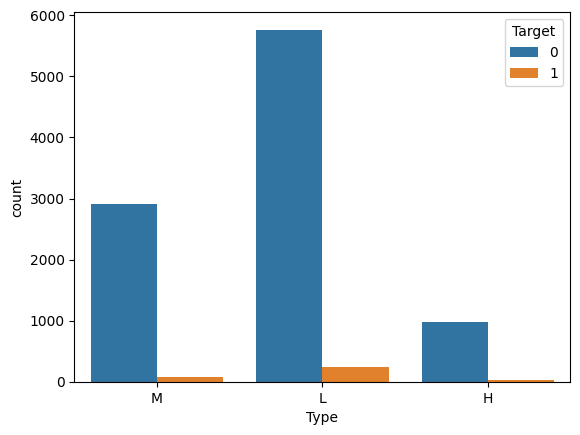

In [58]:
sns.countplot(data=df,x='Type',hue='Target')

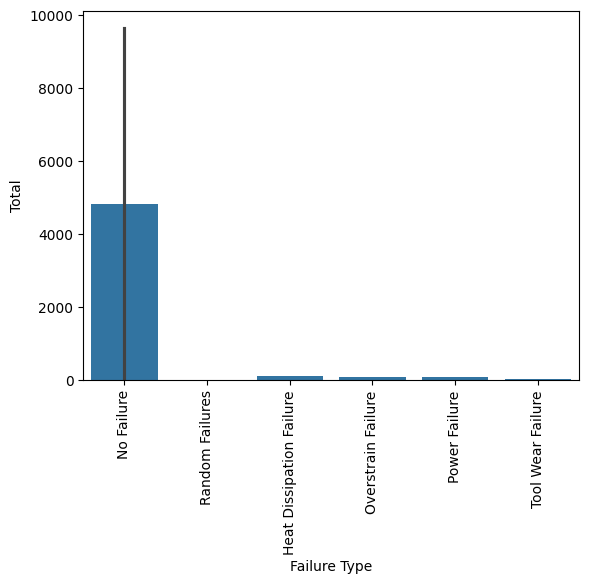

In [59]:
sns.barplot(data=total_Values,x='Failure Type',y='Total')
plt.xticks(rotation=90)
plt.show()

In [60]:
df1.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type'],
      dtype='object')

<Axes: xlabel='Air temperature [K]', ylabel='Count'>

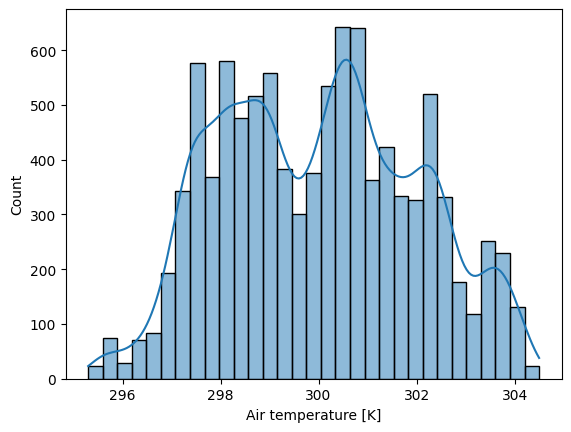

In [ ]:
sns.histplot(data=df,x='Air temperature [K]',kde=True)


In [62]:
print(round(df1['Air temperature [K]'].mean()))
print(round(df1['Air temperature [K]'].median()))

300
300


<Axes: xlabel='Process temperature [K]', ylabel='Count'>

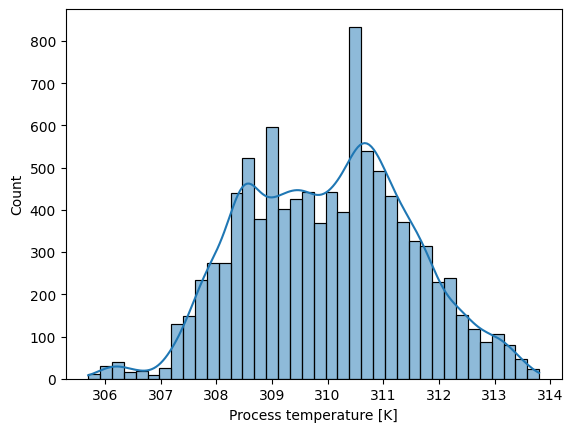

In [63]:
sns.histplot(data=df,x='Process temperature [K]',kde=True)

In [64]:
print(round(df1['Process temperature [K]'].mean()))
print(round(df1['Process temperature [K]'].median()))

310
310


<Axes: xlabel='Torque [Nm]', ylabel='Count'>

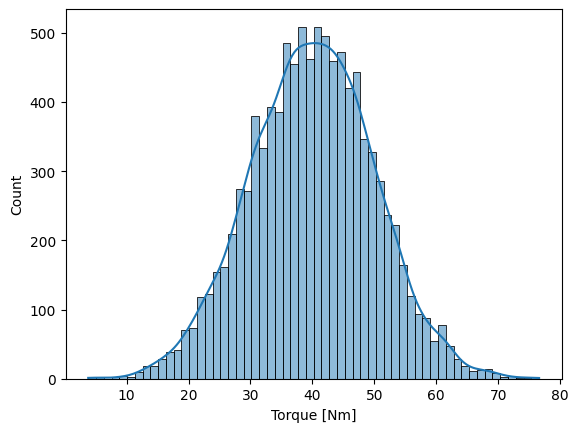

In [65]:
sns.histplot(data=df,x='Torque [Nm]',kde=True)

In [66]:
print(round(df1['Torque [Nm]'].mean()))
print(round(df1['Torque [Nm]'].median()))

40
40


<Axes: xlabel='Rotational speed [rpm]', ylabel='Count'>

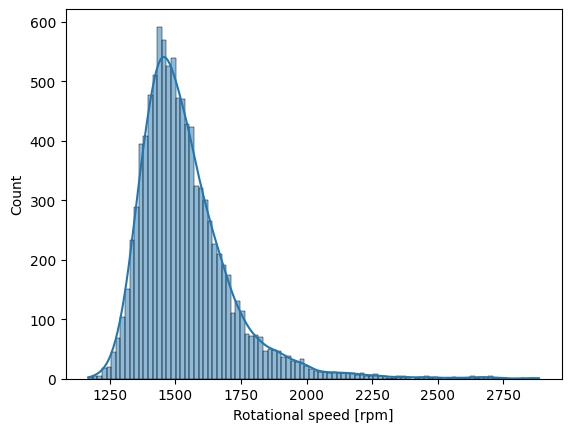

In [67]:
sns.histplot(data=df,x='Rotational speed [rpm]',kde=True)

In [68]:
print(round(df1['Rotational speed [rpm]'].mean()))
print(round(df1['Rotational speed [rpm]'].median()))

1539
1503


<Axes: xlabel='Tool wear [min]', ylabel='Count'>

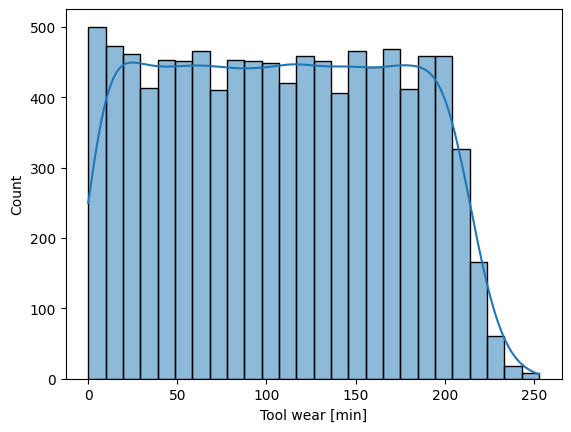

In [69]:
sns.histplot(data=df,x='Tool wear [min]',kde=True)

In [70]:
print(round(df1['Tool wear [min]'].mean()))
print(round(df1['Tool wear [min]'].median()))

108
108


In [ ]:
for Col in numerical_Cols:
    if Col!='UDI':
        print(Col,df1[Col].skew())    #if Value ranges between -0.5 to 0.5 then it is normal Distribution else not.

Air temperature [K] 0.11427392052155042
Process temperature [K] 0.015027267769228572
Rotational speed [rpm] 1.9931710047137523
Torque [Nm] -0.00951659584005855
Tool wear [min] 0.027292239050452527


In [ ]:
sns.histplot(data=df1,x='Rotational speed [rpm]_LOG',kde=True)

In [ ]:
df1.drop(['Rotational speed [rpm]_YJ',
       'Rotational speed [rpm]_SQRT', 'Rotational speed [rpm]_RP',
       'Rotational speed [rpm]_EXP', 
       'Rotational speed [rpm]_BX','Rotational speed [rpm]'],axis=1,inplace=True)

In [ ]:
df1.columns

In [ ]:
df1.dtypes

In [ ]:
num_Cols=['Air temperature [K]', 'Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]','Rotational speed [rpm]_YJ']
for i in num_Cols:
    print("Column Name:",i)
    sns.boxplot(df1[i],orient='h')
    plt.show()

In [ ]:
def outlier(df, column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    upper_threshold = df[column].quantile(0.75) + (1.5*iqr)
    lower_threshold = df[column].quantile(0.25) - (1.5*iqr)
    df[column] = df[column].clip(lower_threshold, upper_threshold)
    dict_VALUE={'IQR':iqr,'UPPER_TH':upper_threshold,'LOWER_TH':lower_threshold}
    return dict_VALUE

print(outlier(df1,'Rotational speed [rpm]_YJ'))
print(outlier(df1,'Torque [Nm]'))

In [ ]:
for i in num_Cols:
    print("Column Name:",i)
    sns.boxplot(df1[i],orient='h')
    plt.show()

### Feature Encoding

In [ ]:
df1.Type.unique()

In [ ]:
df2=df1.copy()

In [ ]:
df2['Product Type']=df2['Type'].map({'L':1,'M':2,'H':3})

In [ ]:
df2.drop('Type',axis=True,inplace=True)

In [ ]:
df2.columns

In [ ]:
df2.dtypes

In [ ]:
df2['Failure Type'].unique()

In [ ]:
df2['Failure_Type']=df2['Failure Type'].map({'No Failure':0,'Power Failure':1,'Tool Wear Failure':2,'Overstrain Failure':3, 'Random Failures':4,'Heat Dissipation Failure':5})
df2['Failure_Type'].unique()

In [ ]:
df2.groupby(['Failure Type']).size()

In [ ]:
df2.drop(['Failure Type'],axis=1,inplace=True)

In [ ]:
df2.columns

In [ ]:
# df3=df2.drop('Failure_Type',axis=1)
# df3.to_csv("Target_Dataset.csv",index=False)

In [ ]:
# df4=df2.drop('Target',axis=1)
# df4.to_csv('Failure_Type.csv',index=False)